# Plot Butler's importance in his Chicago Bulls years

## Imports 

In [1]:
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.image as mpimg

from PIL import Image

import datetime
from highlight_text import fig_text

## Retrieve data for Chicago


In [2]:
df1 = pd.read_csv("../data/teams_total/chicago_2011-2012.csv")
df2 = pd.read_csv("../data/teams_total/chicago_2012-2013.csv")
df3 = pd.read_csv("../data/teams_total/chicago_2013-2014.csv")
df4 = pd.read_csv("../data/teams_total/chicago_2014-2015.csv")
df5 = pd.read_csv("../data/teams_total/chicago_2015-2016.csv")
df6 = pd.read_csv("../data/teams_total/chicago_2016-2017.csv")

In [3]:
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [4]:
df.head()

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Luol Deng,26,54,54,2129,311,755,0.412,79,...,0.770,77,273,350,157,56,36,96,81,828
1,2,Carlos Boozer,30,66,66,1948,448,842,0.532,0,...,0.693,114,450,564,125,63,24,115,168,991
2,3,Joakim Noah,26,64,64,1945,249,490,0.508,0,...,0.748,242,387,629,160,41,92,92,162,652
3,4,Ronnie Brewer,26,66,43,1635,190,445,0.427,19,...,0.560,72,159,231,137,72,21,59,64,455
4,5,Kyle Korver,30,65,7,1469,178,412,0.432,118,...,0.833,26,133,159,112,36,15,53,110,529


In [5]:
#df.loc[df['Player'].str.split().str.len() == 2, 'Player'] = df['Player'].str.split().str[-1]
df['Player']= df['Player'].str.split().str[-1]


In [6]:
df = df[['Player','FG', 'MP', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'PTS']]

In [7]:
df = df.groupby(['Player']).sum().reset_index()

## Plot different stats and Jimmy's rank in the team

In [8]:
points = df.sort_values(by=['PTS'], ascending=False).head(5)
assists = df.sort_values(by=['AST'], ascending=False).head(5)
rebounds = df.sort_values(by=['TRB'], ascending=False).head(5)
minutes = df.sort_values(by=['MP'], ascending=False).head(5)
freethrows = df.sort_values(by=['FT'], ascending=False).head(5)

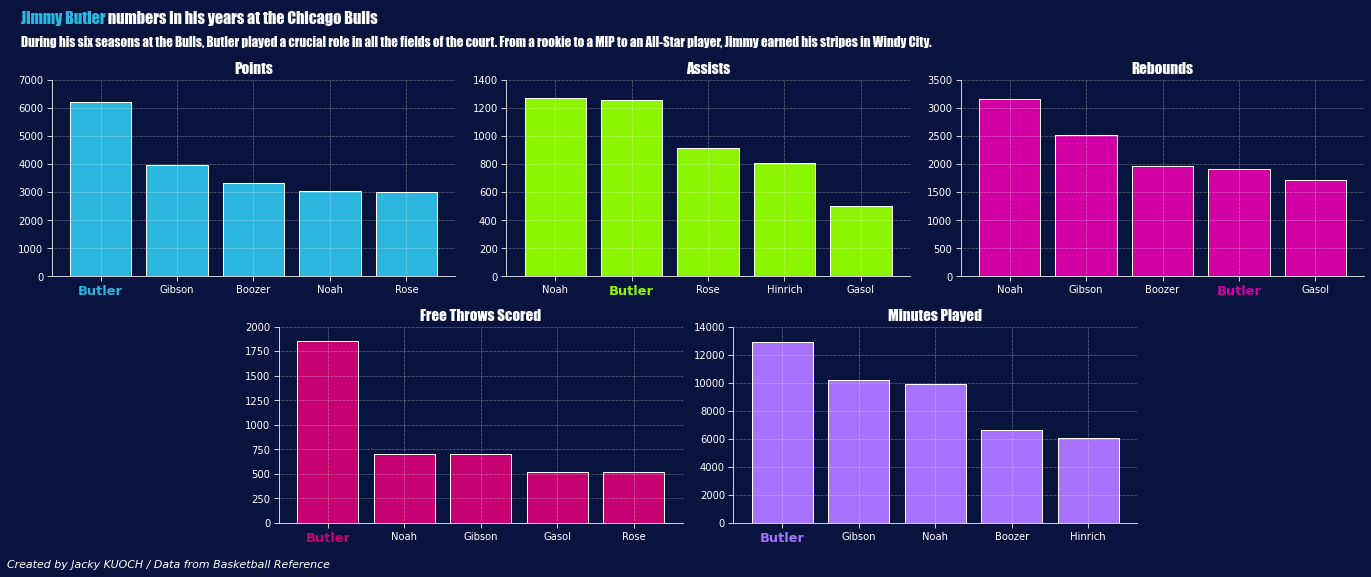

In [9]:
# Create subplots
fig,axs = plt.subplots(2,3,figsize = (19,7))
hfont = {'fontname':'Impact'}

#Position of the plots
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

#Add grid to the plots
ax1.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax2.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax3.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax4.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax5.grid(ls="dotted", lw="0.5", color="w", zorder=1)

#Change the background color
fig.set_facecolor("#08143D")
ax1.patch.set_facecolor("#08143D")
ax2.patch.set_facecolor("#08143D")
ax3.patch.set_facecolor("#08143D")
ax4.patch.set_facecolor("#08143D")
ax5.patch.set_facecolor("#08143D")

#Change the ticks color
ax1.tick_params(colors="w", length=5)
ax2.tick_params(colors="w", length=5)
ax3.tick_params(colors="w", length=5)
ax4.tick_params(colors="w", length=5)
ax5.tick_params(colors="w", length=5)

#Change the axes color
## First plot
ax1.spines['bottom'].set_color("w")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color("w")

## Second plot
ax2.spines['bottom'].set_color("w")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color("w")

## Third plot
ax3.spines['bottom'].set_color("w")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_color("w")

## Fourth plot
ax4.spines['bottom'].set_color("w")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_color("w")

## Fith plot
ax5.spines['bottom'].set_color("w")
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_color("w")

## Set ylimits
ax1.set_ylim(0,7000)
ax2.set_ylim(0,1400)
ax3.set_ylim(0,3500)
ax4.set_ylim(0,2000)
ax5.set_ylim(0,14000)

# Title and credits
fig_text(0.01,1.08, s="<Jimmy Butler> numbers in his years at the Chicago Bulls\n", highlight_textprops=[{"color": '#2bb6e0'}], fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.01,1.01, "During his six seasons at the Bulls, Butler played a crucial role in all the fields of the court. From a rookie to a MIP to an All-Star player, Jimmy earned his stripes in Windy City.", fontsize = 13, fontweight="light", color = "w", **hfont)
fig.text(0, -0.025, "Created by Jacky KUOCH / Data from Basketball Reference",fontstyle="italic",fontsize=11, color="w")

# Plot bar charts of stats
ax1.bar(points['Player'], points['PTS'], zorder=0, color="#2bb6e0",edgecolor = 'w')
ax2.bar(assists['Player'], assists['AST'], zorder=0, color="#8BF600",edgecolor = 'w')
ax3.bar(rebounds['Player'], rebounds['TRB'], zorder=0, color="#D200A4",edgecolor = 'w')
ax4.bar(freethrows['Player'], freethrows['FT'],zorder=0, color="#C60070",edgecolor = 'w')
ax5.bar(minutes['Player'], minutes['MP'],zorder=0, color="#A672FF",edgecolor = 'w')

# Axes Label
ax1.set_title("Points", color="w", fontsize=15 , **hfont)
ax2.set_title("Assists", color="w", fontsize=15 , **hfont)
ax3.set_title("Rebounds", color="w", fontsize=15 , **hfont)
ax4.set_title("Free Throws Scored", color="w", fontsize=15 , **hfont)
ax5.set_title("Minutes Played", color="w", fontsize=15 , **hfont)

#Highlight Jimmy's xticks for first plot
ax1.get_xticklabels()[0].set_color("#2bb6e0")
ax1.get_xticklabels()[0].set_fontsize(13)
ax1.get_xticklabels()[0].set_weight("heavy")

#Highlight Jimmy's xticks for second plot
ax2.get_xticklabels()[1].set_color("#8BF600")
ax2.get_xticklabels()[1].set_fontsize(13)
ax2.get_xticklabels()[1].set_weight("heavy")

#Highlight Jimmy's xticks for third plot
ax3.get_xticklabels()[3].set_color("#D200A4")
ax3.get_xticklabels()[3].set_fontsize(13)
ax3.get_xticklabels()[3].set_weight("heavy")

#Highlight Jimmy's xticks for fourth plot
ax4.get_xticklabels()[0].set_color("#C60070")
ax4.get_xticklabels()[0].set_fontsize(13)
ax4.get_xticklabels()[0].set_weight("heavy")

#Highlight Jimmy's xticks for fith plot
ax5.get_xticklabels()[0].set_color("#A672FF")
ax5.get_xticklabels()[0].set_fontsize(13)
ax5.get_xticklabels()[0].set_weight("heavy")

fig.tight_layout()
